Librarias

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

Leitura Dataset

In [7]:
data = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
data.shape

(8732, 8)

In [9]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

Espetograma de um Ar Condicionado

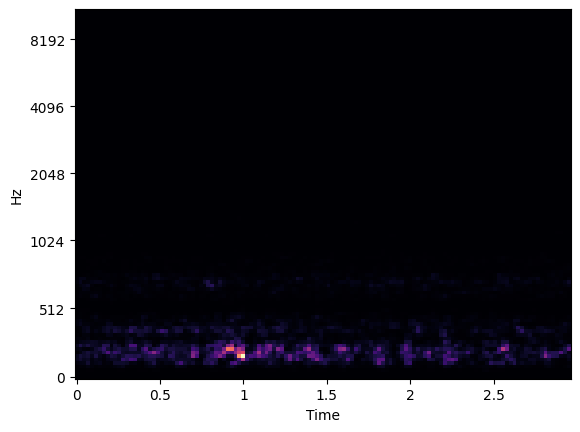

In [25]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/134717-0-0-19.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de uma Buzina de Carro

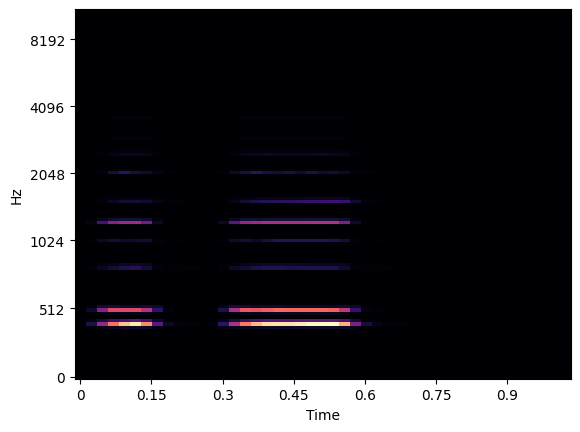

In [28]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/19026-1-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de Crianças a Brincar

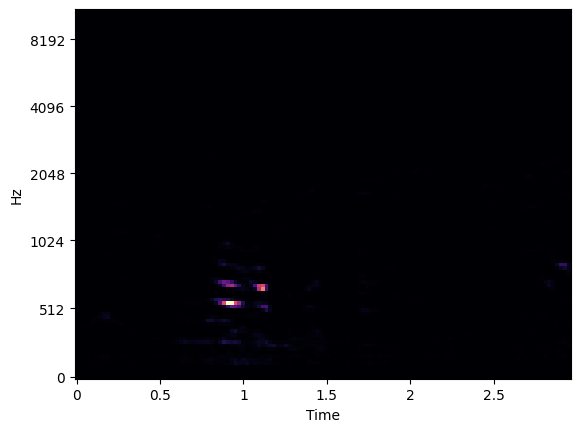

In [29]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/193698-2-0-114.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de um Cão a Ladrar

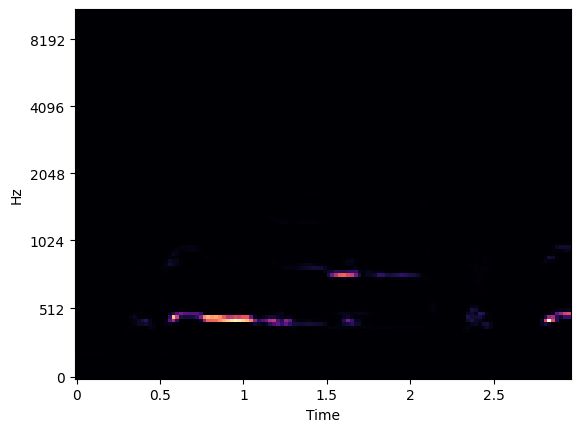

In [32]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/197073-3-4-3.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de uma Prefuração

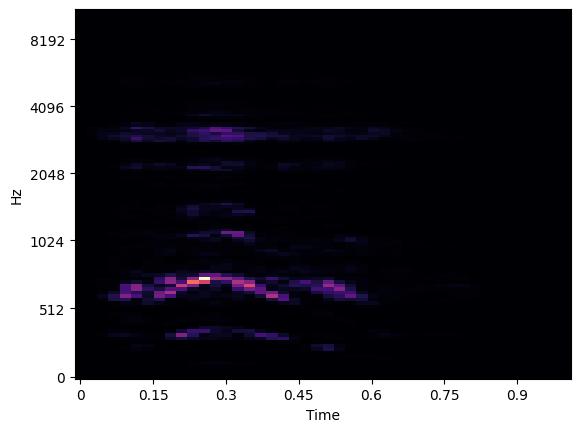

In [33]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/165645-4-5-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de um Motor a Trabalhar

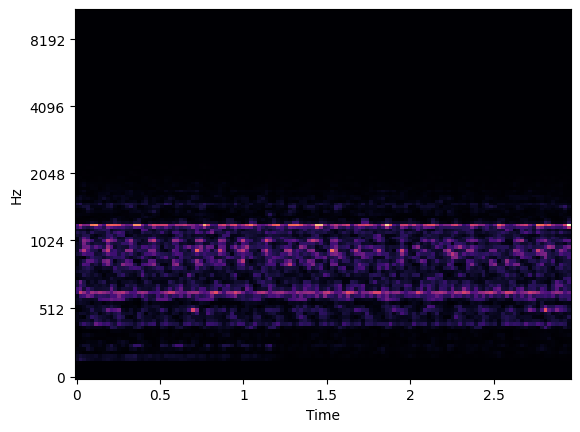

In [34]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/176787-5-0-18.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de um Tiro

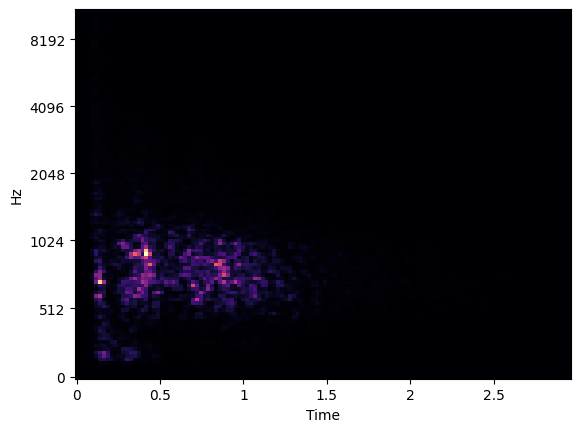

In [37]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/122690-6-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de uma Broca


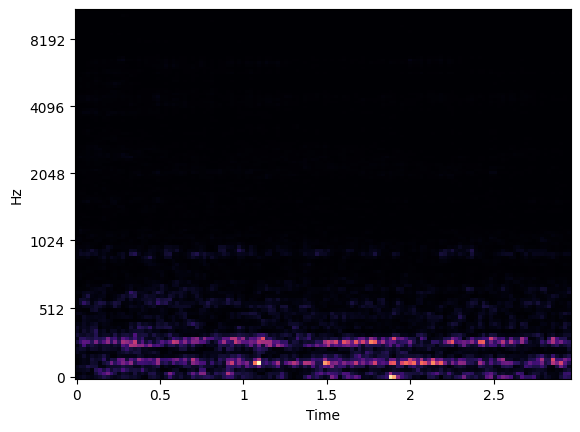

In [38]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/103074-7-4-3.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de uma Sirene

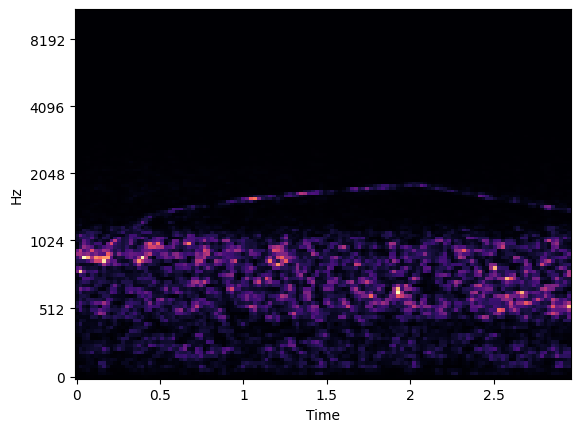

In [42]:
y, sr = librosa.load('UrbanSound8K/audio/fold6/135160-8-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Espetograma de uma Música de Rua

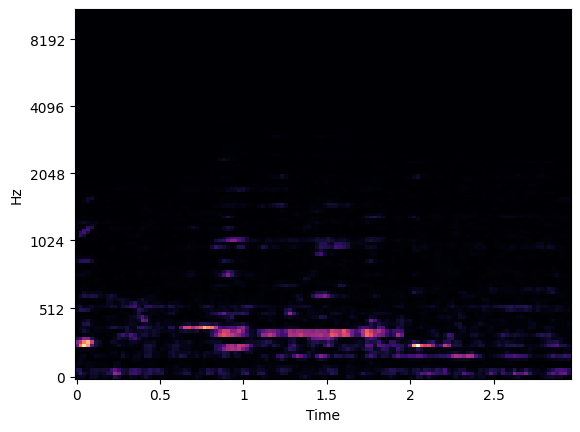

In [44]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/172314-9-0-51.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [14]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [16]:
D = [] # Dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('UrbanSound8K/audio/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [17]:
print("Number of samples: ", len(D))

Number of samples:  7467


In [18]:
dataset = D
random.shuffle(dataset)

train = dataset[:7000]
test = dataset[7000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

Modelo CNN 2D

In [21]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

Executar CNN 2D


In [22]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.1581 - loss: 3.7927 - val_accuracy: 0.2634 - val_loss: 2.1453
Epoch 2/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.2266 - loss: 2.1822 - val_accuracy: 0.3084 - val_loss: 1.9463
Epoch 3/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - accuracy: 0.2970 - loss: 1.9665 - val_accuracy: 0.4561 - val_loss: 1.6433
Epoch 4/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.3663 - loss: 1.7914 - val_accuracy: 0.5011 - val_loss: 1.5370
Epoch 5/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - accuracy: 0.4295 - loss: 1.6233 - val_accuracy: 0.5396 - val_loss: 1.3836
Epoch 6/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - accuracy: 0.4660 - loss: 1.5328 - val_accuracy: 0.5268 - val_loss: 1.2904
Epoch 7/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 256ms/step - accuracy: 0.4875 - loss: 1.4398 - val_accuracy: 0.5867 - val_loss: 1.2548
Epoch 8/12
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.5309 - loss: 1.3870 - val_accu